##Parte I: Gerar tráfego de chamadas segundo modelo de Erlang-B

### 1) Entradas: λ = taxa de chegada de chamadas, μ = taxa de saída de chamada, C = quantidade de canais, Q = quantidade de chamadas simuladas.

### 2) Para cada chamada que chega, gerar um sorteio de uma variável aleatória exponencial com média 1/μ e outra com média 1/λ, representando a saída da chamada e a chegada de uma nova chamada, respectivamente.

In [9]:
# # As variáveis aleatórias representam tempo em segundos

  # Duração da chamada que saí em segs.
  # Duração da chamada que chega em segs.
def random_call_in(lmd):
  # Modelar a saída da chamada como variável aleatória exponencial - média 1/lmd

  call_in = np.random.exponential(1/lmd)
  return call_in

def random_call_out(mu):
  # Modelar a saída da chamada como variável aleatória exponencial - média 1/mu

  call_out = np.random.exponential(1/mu)
  return call_out



### 3) Computar a ocupação da chamada e reduzir a quantidade de canais disponíveis.

### 4) Atualizar o calendário de eventos organizando os tempos de cada evento (chegada ou saída) em ordem crescente.

### 5) Criar um laço que verifica que: (i) se o o evento é uma chegada de chamada, repete-se os passos 2 a 4; (ii) se o evento é uma saída de chamada, apenas a ocupação é atualizada (canal volta a ser disponível) e repete-se o passo 4.

### 6) O laço deve-se repetir por Q chamadas.
### 7) As chamadas que não forem atendidas por falta de canais devem ser computadas para cálculo da taxa de bloqueio (chamadas bloqueadas/total de chamadas geradas).

In [6]:
def erlangb_simuls(lmd, mu, C, Q):
  # Iniciar o calendário em t=0
  t_now = 0
  C_busy = 0
  blocked_calls = 0
  total_calls = 0

  # Calendário

  # Chamada que chega -> 0; chamada que saí -> 1
  calendar = []
  list_occup_chan = []

  # Antes de chegar ou sair novas chamadas tem-se a primeira chamada que chega
  call_1 = random_call_in(lmd)
  print(f"Chegada inicial: {call_1}")
  calendar.append( (call_1, 0))
  print(f"Calendário inicial: {calendar}")


  while total_calls < Q:
    # Enquanto houverem chamadas para acontecer, ordenar o calendário pelo tempo
    calendar.sort()
    t_event, status_event = calendar.pop(0)
    #print('status', status_event)
    t_now = t_event # O tempo atual é o tempo do evento em si
    print(f"Canais ocupados no momento: {C_busy}\n")

    if status_event == 0: # Chegada de uma nova chamada
        total_calls += 1 # Atualizar a quantidade total de chamadas

        # Gerar uma nova chegada (Passo 2)
        t_new = t_now + random_call_in(lmd)
        calendar.append((t_new, 0))

        # Considerar a ocupação do canal (Passo 3)

        if C_busy < C:
          C_busy += 1

          # Se o canal é ocupado, agendamos a saída primeiro
          call_out = random_call_out(mu)
          calendar.append( (t_now + call_out, 1) )
          list_occup_chan.append( (t_event, status_event))
          print(f'Canais ocupados: {list_occup_chan}')
          print(f'Canais ocupados no momento: {C_busy}\n')

        else: # Não tem canal disponível -> Chamada bloqueada
          blocked_calls += 1
          print('BLOQUEIO DE CHAMADA.\n')

    # (Passo 5)
    elif status_event == 1: # Saída de uma chamada (status -> 1)
        # Não gera-se a chegada de nova chamada.

        #total_calls -= 1 # Reduzir a quantidade total de chamadas

        # Computar a ocupação e deixar o canal disponível
        C_busy -= 1
        print('CANAL DISPONÍVEL.\n')
        list_occup_chan.pop(0) # Remover o último canal da lista de canais ocupados

    print(f'Calendário de eventos atualizado: {sorted(calendar)}\n') # Printar o calendário atualizado para cada chamada

  return blocked_calls/total_calls



### 8) Crie uma função que calcule de forma recursiva a probabilidade de bloqueio segundo a fórmula de Erlang-B.


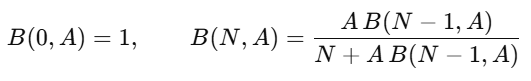

In [5]:
def erlang_b_recursive(C, A):
    if C == 0:
        return 1.0
    prev_c = erlang_b_recursive(C - 1, A)
    return (A * prev_c) / (C + A * prev_c)

### 9) Varie os valores das entradas e plote gráficos de convergência da taxa de bloqueio obtida pelo simulador com a probabilidade de bloqueio obtida com a sua função. Aumento o valor de Q de forma gradativa de modo a encontrar a quantidade de chamadas em que a taxa e o bloqueio convergem com um erro ε.


## Caso 1 - Bloqueio extremamente alto (teórico). Para cada 2 chamadas que chegam, 1 é bloqueada.

### Pb = 50\%
### A =  6.5
### C = 4
### lmd = 50
### Q = np.arange(1, 200, 10) # Quantidade de chamadas

Chegada inicial: 0.016551455629626028
Calendário inicial: [(0.016551455629626028, 0)]
Canais ocupados no momento: 0

Canais ocupados: [(0.016551455629626028, 0)]
Canais ocupados no momento: 1

Calendário de eventos atualizado: [(0.060651200643935296, 1), (0.06763036482713991, 0)]

Chegada inicial: 0.010671558528913258
Calendário inicial: [(0.010671558528913258, 0)]
Canais ocupados no momento: 0

Canais ocupados: [(0.010671558528913258, 0)]
Canais ocupados no momento: 1

Calendário de eventos atualizado: [(0.0805658706838845, 0), (0.2920143673503335, 1)]

Canais ocupados no momento: 1

Canais ocupados: [(0.010671558528913258, 0), (0.0805658706838845, 0)]
Canais ocupados no momento: 2

Calendário de eventos atualizado: [(0.09744998137548673, 0), (0.14881297728391998, 1), (0.2920143673503335, 1)]

Canais ocupados no momento: 2

Canais ocupados: [(0.010671558528913258, 0), (0.0805658706838845, 0), (0.09744998137548673, 0)]
Canais ocupados no momento: 3

Calendário de eventos atualizado: [(

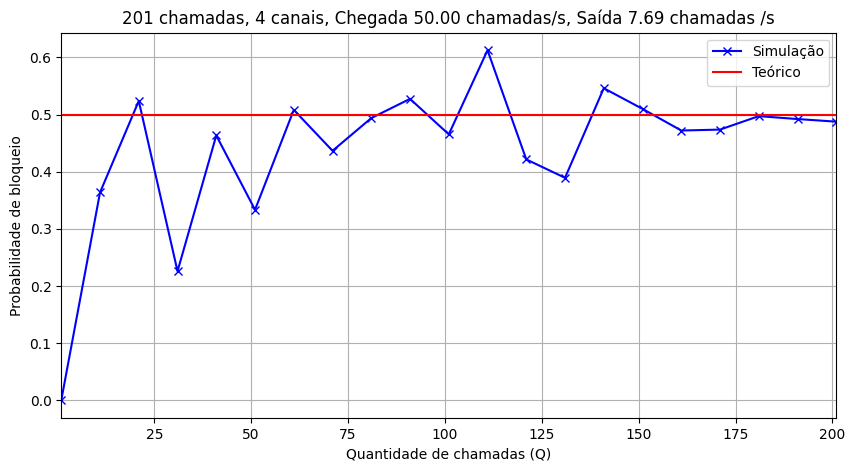

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Definição das entradas

# Da Tabela Erlang-B
A =  6.5
C = 4
lmd = 50 # chamadas/seg. # taxa de chegada
mu = lmd/A # chamadas/seg. # taxa de saída

Q = np.arange(1, 210, 10) # Quantidade de chamadas

A = lmd/mu # Tráfego (Relação entre chamadas que entram e chamadas que saem)
erlang_theo = erlang_b_recursive(C, A)

# Simulações
simulations = np.zeros((len(Q)))
simulations = [erlangb_simuls(lmd, mu, C, q) for q in Q]

plt.figure(figsize=(10,5))
plt.plot(Q, simulations, '-x', color='blue')
plt.xlim([Q[0], Q[-1]])
plt.axhline(y=erlang_theo, color='red')
plt.xlabel("Quantidade de chamadas (Q)")
plt.ylabel("Probabilidade de bloqueio")
plt.title(f"{Q[-1]} chamadas, {C} canais, Chegada {lmd:.2f} chamadas/s, Saída {mu:.2f} chamadas /s")
plt.grid(True)
plt.legend(["Simulação", "Teórico"])
plt.savefig(f'erlang_simul_tráfego_{A}_{C}_canais.png', format='png')

repeat_erl_theo = np.full(len(simulations), erlang_theo)
mse = mean_squared_error(repeat_erl_theo, simulations)
print(f"\nMSE obtido: {mse:.3f}")

## Caso 2 - Bloqueio bastante alto (teórico).

### Pb = 20%
### A =  9.68
### C = 10
### lmd = 100
### Q = 400 # Quantidade de chamadas

### λ

### μ



---



Streaming output truncated to the last 5000 lines.
Calendário de eventos atualizado: [(3.7383580860841192, 1), (3.753766125753906, 0), (3.756647007518557, 1), (3.778537567416309, 1), (3.923144039157598, 1), (3.995393057948398, 1), (4.398328699976276, 1)]

Canais ocupados no momento: 6

CANAL DISPONÍVEL.

Calendário de eventos atualizado: [(3.753766125753906, 0), (3.756647007518557, 1), (3.778537567416309, 1), (3.923144039157598, 1), (3.995393057948398, 1), (4.398328699976276, 1)]

Canais ocupados no momento: 5

Canais ocupados: [(3.667678599843632, 0), (3.6865361336936466, 0), (3.6960413994537458, 0), (3.728396402330218, 0), (3.7344619659215934, 0), (3.753766125753906, 0)]
Canais ocupados no momento: 6

Calendário de eventos atualizado: [(3.756245342463723, 0), (3.756647007518557, 1), (3.778537567416309, 1), (3.923144039157598, 1), (3.958719683093443, 1), (3.995393057948398, 1), (4.398328699976276, 1)]

Canais ocupados no momento: 6

Canais ocupados: [(3.667678599843632, 0), (3.6865361

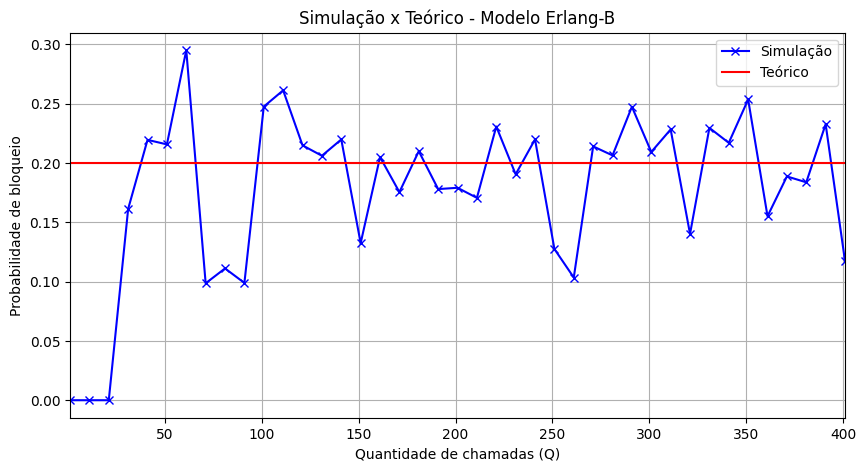

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Definição das entradas

# Da Tabela Erlang-B
A =  9.68
C = 10
lmd = 100 # chamadas/seg. # taxa de chegada
mu = lmd/A # chamadas/seg. # taxa de saída

Q = np.arange(1, 410, 10) # Quantidade de chamadas

A = lmd/mu # Tráfego (Relação entre chamadas que entram e chamadas que saem)
erlang_theo = erlang_b_recursive(C, A)

# Simulações
simulations = np.zeros((len(Q)))
simulations = [erlangb_simuls(lmd, mu, C, q) for q in Q]

plt.figure(figsize=(10,5))
plt.plot(Q, simulations, '-x', color='blue')
plt.axhline(y=erlang_theo, color='red')
plt.xlim([Q[0], Q[-1]])
plt.xlabel("Quantidade de chamadas (Q)")
plt.ylabel("Probabilidade de bloqueio")
plt.title(f"Simulação x Teórico - Modelo Erlang-B")
plt.grid(True)
plt.legend(["Simulação", "Teórico"])
plt.savefig(f'erlang_simul_tráfego_{A}_{C}_canais.png', format='png')

repeat_erl_theo = np.full(len(simulations), erlang_theo)
mse = mean_squared_error(repeat_erl_theo, simulations)
print(f"\nMSE obtido: {mse:.3f}")

## Caso 3 - Bloqueio alto (teórico).

### Pb = 5%
### A =  10.6
### C = 15
### lmd = 200
### Q = np.arange(1, 515, 15) # Quantidade de chamadas



Streaming output truncated to the last 5000 lines.

CANAL DISPONÍVEL.

Calendário de eventos atualizado: [(0.4523763918026036, 1), (0.4539097862624931, 1), (0.4552116540479687, 1), (0.45745519497215875, 0), (0.45863460474067974, 1), (0.4711601313003016, 1), (0.49292412502272426, 1), (0.5773276098255038, 1), (0.584500545655025, 1), (0.7053073436498448, 1)]

Canais ocupados no momento: 9

CANAL DISPONÍVEL.

Calendário de eventos atualizado: [(0.4539097862624931, 1), (0.4552116540479687, 1), (0.45745519497215875, 0), (0.45863460474067974, 1), (0.4711601313003016, 1), (0.49292412502272426, 1), (0.5773276098255038, 1), (0.584500545655025, 1), (0.7053073436498448, 1)]

Canais ocupados no momento: 8

CANAL DISPONÍVEL.

Calendário de eventos atualizado: [(0.4552116540479687, 1), (0.45745519497215875, 0), (0.45863460474067974, 1), (0.4711601313003016, 1), (0.49292412502272426, 1), (0.5773276098255038, 1), (0.584500545655025, 1), (0.7053073436498448, 1)]

Canais ocupados no momento: 7

CANAL DIS

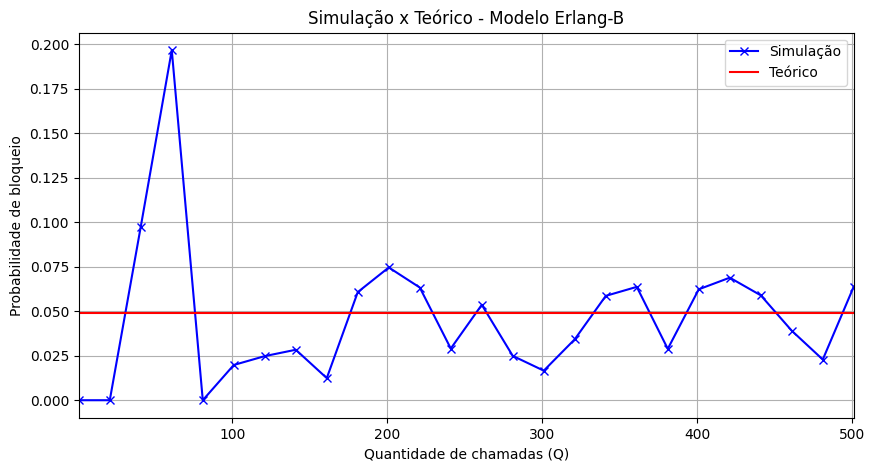

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Definição das entradas

# Da Tabela Erlang-B
A =  10.6
C = 15
lmd = 200 # chamadas/seg. # taxa de chegada
mu = lmd/A # chamadas/seg. # taxa de saída

Q = np.arange(1, 520, 20) # Quantidade de chamadas

A = lmd/mu # Tráfego (Relação entre chamadas que entram e chamadas que saem)
erlang_theo = erlang_b_recursive(C, A)

# Simulações
simulations = np.zeros((len(Q)))
simulations = [erlangb_simuls(lmd, mu, C, q) for q in Q]

plt.figure(figsize=(10,5))
plt.plot(Q, simulations, '-x', color='blue')
plt.axhline(y=erlang_theo, color='red')
plt.xlim([Q[0], Q[-1]])
plt.xlabel("Quantidade de chamadas (Q)")
plt.ylabel("Probabilidade de bloqueio")
plt.title(f"Simulação x Teórico - Modelo Erlang-B")
plt.grid(True)
plt.legend(["Simulação", "Teórico"])
plt.savefig(f'erlang_simul_tráfego_{A}_{C}_canais.png', format='png')

repeat_erl_theo = np.full(len(simulations), erlang_theo)
mse = mean_squared_error(repeat_erl_theo, simulations)
print(f"\nMSE obtido: {mse:.3f}")

### 10) Crie um exemplo de entradas na qual encontre a quantidade de canais que garante uma probabilidade (taxa) de bloqueio de 1%. Compare o tempo de execução da sua função e do seu simulador a medida que a carga ρ=λ/μ aumenta.

In [7]:
def erlang_b_channels(A, B_target, C_max=10000):
    #Fórmula para obter o número mínimo de canais C tal que Erlang-B(C,A) <= Bloqueio
    B = 1.0   # B_0 (assumir um bloqueio de 100% inicialmente)
    C = 0
    while B > B_target:
        C += 1
        B = (A * B) / (C + A * B)

    return C, B

### Comparação em relação à variação da carga (A)


Streaming output truncated to the last 5000 lines.

Canais ocupados: [(1.032312241425029, 0), (1.0468319638435488, 0), (1.0535807129624528, 0), (1.0548477650000039, 0), (1.0549736650049362, 0), (1.0762673465743169, 0), (1.0804810240741283, 0), (1.0848337390674279, 0), (1.1030340882760699, 0), (1.108013017358739, 0), (1.1169031402432694, 0), (1.122055769095922, 0), (1.1321207880409594, 0), (1.1497900251852493, 0), (1.1516492934630858, 0), (1.153718760731102, 0), (1.1641287158996156, 0), (1.1643788495644751, 0), (1.168770815921774, 0)]
Canais ocupados no momento: 19

Calendário de eventos atualizado: [(1.1711228835498395, 1), (1.1718452583861318, 1), (1.1725657921239976, 1), (1.180843517756898, 1), (1.182991757081746, 0), (1.1852355491271418, 1), (1.1872703402023723, 1), (1.1882138837916414, 1), (1.1889729592388298, 1), (1.2045022098978133, 1), (1.2424338192642752, 1), (1.2789547484048804, 1), (1.2838980034485534, 1), (1.3633439742183024, 1), (1.3709909406875986, 1), (1.3812952565479453,

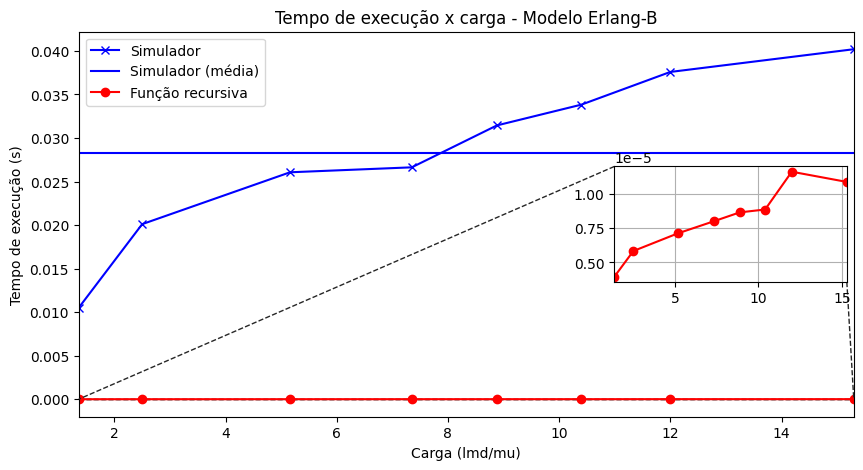

<Figure size 640x480 with 0 Axes>

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Definição das entradas

# Da Tabela Erlang-B
# Pb = 1%

lmd = 100 # chamadas/seg. # taxa de chegada
Q = np.arange(1, 515, 15) # Quantidade de chamadas

A =  [1.36, 2.50, 5.16, 7.35, 8.88, 10.4, 12, 15.3] # Tráfego (Relação entre chamadas que entram e chamadas que saem)
B_target = 0.01 # 1% de bloqueio
# Simulações
simul = np.zeros((len(Q), len(A))) # np.zeros((p,q)) -> (p,q) is a tuple
t_fnc = []
C_B = {'C': [], 'B': []} # Dicionário com listas vazias
t_simul = np.zeros((len(Q), len(A)))
t_fnc = np.zeros((len(Q), len(A)))

# Erro: téorico x simulado (MSE)
mse_list = []

# Variando a carga (A=lmd/mu)
for i, a_ in enumerate(A):
  # Função

  C_, B_ = erlang_b_channels(a_, B_target, C_max=10000)

  # Guardar os canais encontrados e o bloqueio em um dicionário
  C_B['C'].append(C_)
  C_B['B'].append(B_)

  # Simulador
  for ct, q in enumerate(Q):
    mu = lmd/a_
    t_init = time.perf_counter()
    simul[ct, i] = erlangb_simuls(lmd, mu, C_, q)
    t_stop = time.perf_counter()
    t_simul[ct, i] = t_stop - t_init

    # Canal para o tráfego i
    c = C_B['C'][i]

    # Valor teórico Erlang-C
    t_init = time.perf_counter()
    B_theo = erlang_b_recursive(c, a_)
    t_stop = time.perf_counter()
    t_fnc[ct, i] = t_stop - t_init

    # Média do bloqueio simulado (em Q)
    B_sim_avg = np.mean(simul[:, i])

    mse_list.append((B_theo - B_sim_avg)**2)

mse = np.mean(mse_list)
print(f"\nMSE obtido: {mse:.6f}")

# Comparação - tempo de execução

t_avg_simul = np.mean(t_simul, axis=0)
t_avg_fnc = np.mean(t_fnc, axis=0)
global_t_avg_simul = np.mean(t_avg_simul)
t_comp = global_t_avg_simul/np.mean(t_avg_fnc)

print(f"Tempo médio de execução do simulador: {global_t_avg_simul} s")
print(f"Tempo médio de execução da função: {np.mean(t_avg_fnc)} s")
print(f"Na média, o simulador é x{t_comp} mais lento que a função recursiva.")

plt.figure(figsize=(10,5))


plt.plot(A, t_avg_simul, '-x', color='blue')
plt.plot(A, np.full(len(A), global_t_avg_simul), '-', color='blue')
plt.plot(A, t_avg_fnc, '-o', color='red')
plt.xlim(A[0], A[-1])
plt.xlabel("Carga (lmd/mu)")
plt.ylabel("Tempo de execução (s)")
plt.legend(["Simulador", "Simulador (média)", "Função recursiva"])
plt.title(f"Tempo de execução x carga - Modelo Erlang-B")


# INSET (ZOOM NA CURVA VERMELHA)
ax = plt.gca()

axins = inset_axes(
    ax,
    width="30%",     # tamanho do zoom
    height="30%",
    loc="center right"
)

# Plot SOMENTE da função recursiva
axins.plot(A, t_avg_fnc, '-o', color='red')

# Limites do zoom (ajuste fino)
axins.set_xlim(min(A), max(A))
#axins.set_ylim(0.7 * t_fnc, 1.5 * t_fnc)

axins.grid(True)

# Conecta inset ao gráfico principal
mark_inset(ax, axins, loc1=4, loc2=2, linestyle='--', fc="none", ec="0.15")
plt.show()
plt.savefig(f't_exec_{Q}_chamadas.png', format='png')


In [45]:
C_B

{'C': [5, 7, 12, 14, 17, 18, 20, 25],
 'B': [0.009978893691435975,
  0.009983011310671952,
  0.00428198478962856,
  0.009984642231775757,
  0.005217302372468961,
  0.009731641879013195,
  0.009795639420064077,
  0.0061002972977913855]}

## Parte II:  Gerar tráfego de chamadas segundo modelo de Erlang-C

### Repetir o procedimento da Parte I, porém considerando que não há bloqueio de chamadas. Cada chamada aguarda um tempo em um buffer "infinito." O tempo máximo de espera deve ser um dado de entrada. No exemplo final (passo 10), a limitação de probabilidade de bloqueio de 1% deve ser trocada pela probabilidade de 1% da chamada esperar mais do que 10s.

### Modificando a função usada para criação do calendário (bloqueio de chamada definido lá)

In [18]:
def simulate_erlang_C(lmd, mu, C, Q, t_max):
  # Iniciar o calendário em t = 0
  t_now = 0
  C_busy = 0

  waiting_calls = 0 # Número de chamadas em espera no buffer
  waiting_queue = [] # buffer com os tempos de espera
  long_wait = 0
  total_calls = 0 # Total de chamadas

  # Calendário

  # Chamada que chega -> 0; chamada que saí -> 1
  calendar = []
  list_occup_chan = []

  # Antes de chegar ou sair novas chamadas tem-se a primeira chamada que chega
  call_1 = random_call_in(mu)
  #print(f"Chamada inicial que chega:{call_1}")
  calendar.append( (call_1, 0))
  #print(f"Calendário inicial: {calendar}")

#
  while total_calls < Q:
    # Enquanto houverem chamadas para acontecer, ordenar o calendário pelo tempo
    calendar.sort()

    # Obter o evento mais próximo
    t_event, status_event = calendar.pop(0) # remover o primeiro elemento
    t_now = t_event # O tempo atual é o tempo do evento em si
    #print(f"Canais ocupados no momento: {C_busy}\n")

    # EVENTO DE CHEGADA (0)
    if status_event == 0: # Chegada de uma nova chamada
          total_calls += 1 # Atualizar a quantidade total de chamada

          # Considerar a ocupação do canal (Passo 3)

          # Agendar a próxima chamada
          t_next = t_now + random_call_in(lmd)
          calendar.append((t_next, 0))
          if C_busy < C: # Se o número de canais ocupados é menor que o número de canais
            C_busy += 1 # O canal será ocupado

            # Agendamento e duração da saída
            call_out = random_call_out(mu)
            calendar.append( (t_now + call_out, 1) )
            list_occup_chan.append( (t_event, status_event))
            #print(f'Canais ocupados: {list_occup_chan}')
            #print(f'Canais ocupados no momento: {C_busy}\n')

          else: # Não tem canal disponível -> O usuário irá esperar um certo tempo
            #print('Usuário aguarda no buffer...\n')
            waiting_queue.append(t_now) # Adicionar o tempo atual na fila

    # (Passo 5)
    elif status_event == 1: # Saída de uma chamada (status -> 1)

        if len(waiting_queue) > 0: # Se há alguém na fila será computado no buffer
          # Após a chamada sair, verificar se há alguém para ocupar o canal

          # Primeiro da fila
          t_arrival = waiting_queue.pop(0)

          # Tempo de espera da pessoa na fila
          waiting_time = t_now - t_arrival

          if waiting_time > t_max:
            long_wait += 1 # Longa espera -> Tempo de espera maior do que o do buffer

          # O canal vai continuar ocupado por conta da pessoa ter que sair da fila.

          # Saída e duração da chamada da nova pessoa
          call_out = random_call_out(mu)
          calendar.append( (t_now + call_out, 1))

        else: # Se não tem ninguém na fila para ocupar o canal, então o canal está liberado e outras chamadas podem chegar
          # Computar a ocupação e deixar o canal disponível
          C_busy -= 1
          #print('CANAL LIBERADO.\n')
          list_occup_chan.pop(0) # Remover o último canal da lista de canais ocupados

    #print(f'Calendário de eventos atualizado: {calendar}') # Printar o calendário atualizado para cada chamada

  return long_wait/total_calls

  # Se não tem canal disponível, coloquei um contador para as chamadas de espera.
  # Criei vetor para a fila e nesse caso, atualizo ele com o tempo atual.
  # Atualizo o contador do buffer.

  # Caso o contador do buffer estoure (seja igual ao tempo máximo do buffer), a pessoa é retirada da fila e uma nova chamada chega.

  # Aumentando o tempo do buffer para um valor alto a probabilidade de espera não tende para 1 como seria esperado.



### Cálculo da probabilidade de espera usando a fórmula de Erlang-C

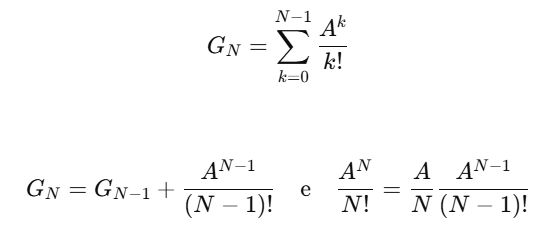

In [17]:
def erlang_c_recursive(N, A):
    if A >= N:
        raise ValueError("Erlang-C requer A < N")

    # Inicialização
    G = 1.0          # soma até k=0
    term = 1.0       # A^0 / 0!

    # Constrói recursivamente
    for k in range(1, N):
        term *= A / k        # A^k / k!
        G += term

    # Termo final A^N / N!
    term *= A / N

    P_wait = (term * N / (N - A)) / (G + term * N / (N - A))
    return P_wait

### 9) Varie os valores das entradas e plote gráficos de convergência da taxa de bloqueio obtida pelo simulador com a probabilidade de bloqueio obtida com a sua função. Aumento o valor de Q de forma gradativa de modo a encontrar a quantidade de chamadas em que a taxa e o bloqueio convergem com um erro ε.


## Caso 1: Probabilidade de espera: 10%
### A = 2.313
### C = 5
### λ = 0.001
### t_máx = 10 s
### Q = 10.000


MSE obtido: 0.00528


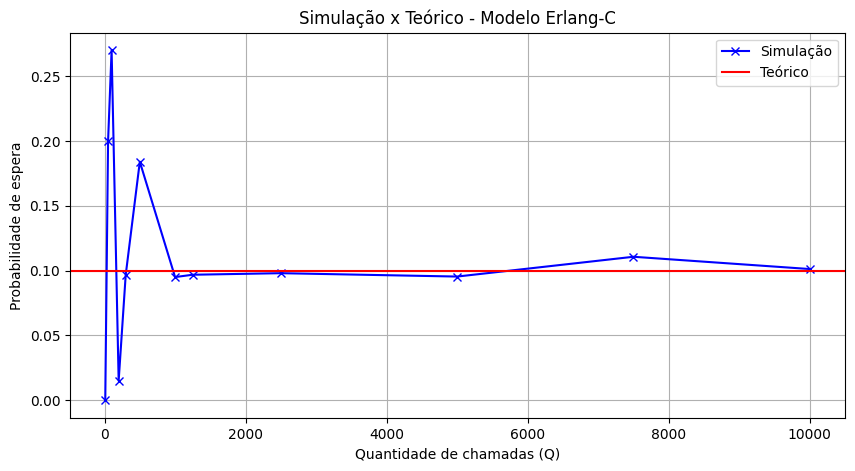

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Definição das entradas

# Da Tabela Erlang-C
A = 2.313
C = 5
lmd = 0.001 # chamadas/seg. # taxa de chegada
mu = lmd/A # chamadas/seg. # taxa de saída
t_max = 10 # tempo de espera máximo em segundos

Q =  [10, 50, 100, 200, 300, 500, 1000, 1250, 2500, 5000, 7500, 10000]

#A = lmd/mu # Tráfego (Relação entre chamadas que entram e chamadas que saem)
erlang_c_theo = erlang_c_recursive(C, A)

# Simulações
simulations = np.zeros((len(Q)))
simulations = [simulate_erlang_C(lmd, mu, C, q, t_max) for q in Q]

plt.figure(figsize=(10,5))
plt.plot(Q, simulations, '-x', color='blue')
plt.axhline(y=erlang_c_theo, color='red')
plt.xlabel("Quantidade de chamadas (Q)")
plt.ylabel("Probabilidade de espera")
plt.title(f"Simulação x Teórico - Modelo Erlang-C")
plt.grid(True)
plt.legend(["Simulação", "Teórico"])
plt.savefig(f'erlang_c_simul_tráfego_{A}_{C}_canais.png', format='png')

repeat_erl_theo = np.full(len(simulations), erlang_c_theo)
mse = mean_squared_error(repeat_erl_theo, simulations)
print(f"\nMSE obtido: {mse:.5f}")


 ### No exemplo final (passo 10), a limitação de probabilidade de bloqueio de 1% deve ser trocada pela probabilidade de 1% da chamada esperar mais do que 10s.

In [21]:
import numpy as np
def erlang_c_recursive_time(N, A, H, t_wait):
    if A >= N:
        raise ValueError("Erlang-C requer A < N")

    # Inicialização
    G = 1.0          # soma até k=0
    term = 1.0       # A^0 / 0!

    # Constrói recursivamente
    for k in range(1, N):
        term *= A / k        # A^k / k!
        G += term

    # Termo final A^N / N!
    term *= A / N

    # Probabilidade de uma chamada esperar por mais que t segundos
    P_wait = (term * N / (N - A)) / (G + term * N / (N - A)) * np.exp( ((N- A)/H)*t_wait)
    return P_wait

### Probabilidade de 1% das chamadas esperarem mais que 10 segundos

###


MSE obtido: 0.00046


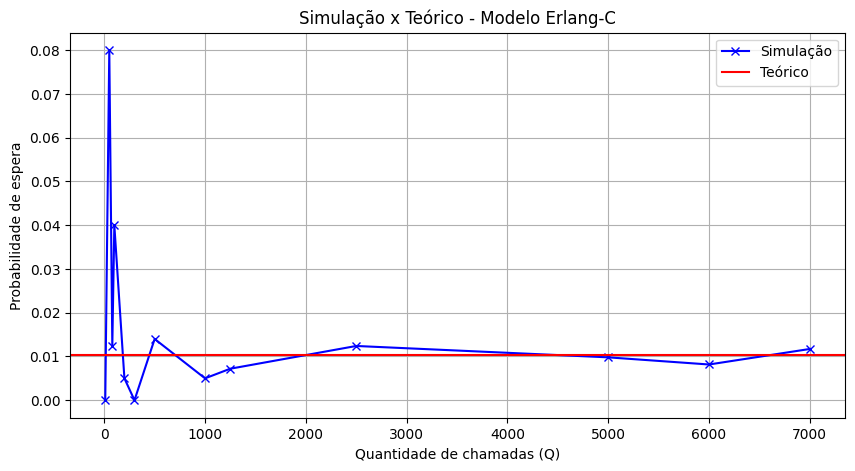

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Definição das entradas

# Da Tabela Erlang-C
A = 1.259
C = 5
lmd = 0.001 # chamadas/seg. # taxa de chegada
mu = lmd/A # chamadas/seg. # taxa de saída
t_max = 10 # tempo de espera em segundos

Q =  [10, 50, 80, 100, 200, 300, 500, 1000, 1250, 2500, 5000, 6000, 7000]
#Q = np.arange(1, 1000, 20) # Quantidade de chamadas

#A = lmd/mu # Tráfego (Relação entre chamadas que entram e chamadas que saem)
H=1/lmd
erlang_c_theo = erlang_c_recursive_time(C, A, H, t_max)

# Simulações
simulations = np.zeros((len(Q)))
simulations = [simulate_erlang_C(lmd, mu, C, q, t_max) for q in Q]

plt.figure(figsize=(10,5))
plt.plot(Q, simulations, '-x', color='blue')
plt.axhline(y=erlang_c_theo, color='red')
plt.xlabel("Quantidade de chamadas (Q)")
plt.ylabel("Probabilidade de espera")
plt.title(f"Simulação x Teórico - Modelo Erlang-C")
plt.grid(True)
plt.legend(["Simulação", "Teórico"])
plt.savefig(f'erlang_c_simul_tráfego_{A}_{C}_canais_{t_max}_s.png', format='png')

repeat_erl_theo = np.full(len(simulations), erlang_c_theo)
mse = mean_squared_error(repeat_erl_theo, simulations)
print(f"\nMSE obtido: {mse:.5f}")


In [47]:
def erlang_c_channels(A, Pw_target, C_max=10000):

    #Obter o número mínimo de canais C tal que a probabilidade seja menor que um valor alvo


    B = 1.0   # Erlang-B for C = 0
    C = 0

    while C < C_max:
        C += 1

        # Erlang-B recursion (same as your function)
        B = (A * B) / (C + A * B)

        # Erlang-C only defined for A < C
        if A < C:
            Pw = B * (C / (C - A))

            if Pw <= Pw_target:
                return C, Pw

    return None, None


## Tempo de execução vs variação da carga (prob. de 1% da chamada esperar mais que 10 segundos)


MSE obtido: 0.000018
Tempo médio de execução do simulador: 0.0009294183107190941 s
Tempo médio de execução da função: 3.599782137696041e-06 s
Na média, o simulador é x258.1873777822419 mais lento que a função recursiva.


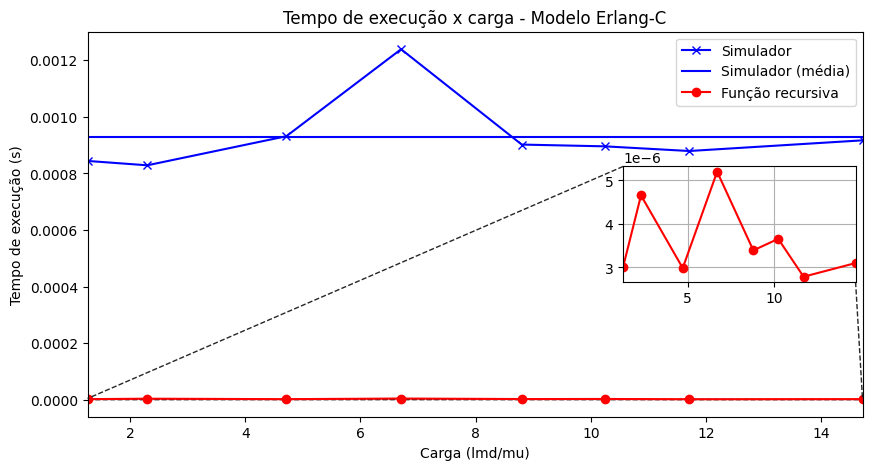

<Figure size 640x480 with 0 Axes>

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Definição das entradas

# Da Tabela Erlang-B
# Pb = 1%

lmd = 100 # chamadas/seg. # taxa de chegada
Q = np.arange(1, 515, 15) # Quantidade de chamadas

A =  [1.259, 2.297, 4.712, 6.705, 8.801, 10.24, 11.71, 14.72] # Tráfego (Relação entre chamadas que entram e chamadas que saem)
B_target = 0.01 # 1% de bloqueio
# Simulações
simul = np.zeros((len(Q), len(A))) # np.zeros((p,q)) -> (p,q) is a tuple
t_fnc = []
C_B = {'C': [], 'B': []} # Dicionário com listas vazias
t_simul = np.zeros((len(Q), len(A)))
t_fnc = np.zeros((len(Q), len(A)))

# Erro: téorico x simulado (MSE)
mse_list = []

# Variando a carga (A=lmd/mu)
for i, a_ in enumerate(A):
  # Função

  C_, B_ = erlang_c_channels(a_, B_target, C_max=10000)

  # Guardar os canais encontrados e o bloqueio em um dicionário
  C_B['C'].append(C_)
  C_B['B'].append(B_)

  # Simulador
  for ct, q in enumerate(Q):
    mu = lmd/a_
    t_init = time.perf_counter()
    simul[ct, i] = simulate_erlang_C(lmd, mu, C_, q, t_max)
    t_stop = time.perf_counter()
    t_simul[ct, i] = t_stop - t_init

    # Canal para o tráfego i
    c = C_B['C'][i]

    # Valor teórico Erlang-C
    t_init = time.perf_counter()
    B_theo = erlang_c_recursive(c, a_)
    t_stop = time.perf_counter()
    t_fnc[ct, i] = t_stop - t_init

    # Média do bloqueio simulado (em Q)
    B_sim_avg = np.mean(simul[:, i])

    mse_list.append((B_theo - B_sim_avg)**2)

mse = np.mean(mse_list)
print(f"\nMSE obtido: {mse:.6f}")

# Comparação - tempo de execução

t_avg_simul = np.mean(t_simul, axis=0)
t_avg_fnc = np.mean(t_fnc, axis=0)
global_t_avg_simul = np.mean(t_avg_simul)
t_comp = global_t_avg_simul/np.mean(t_avg_fnc)

print(f"Tempo médio de execução do simulador: {global_t_avg_simul} s")
print(f"Tempo médio de execução da função: {np.mean(t_avg_fnc)} s")
print(f"Na média, o simulador é x{t_comp} mais lento que a função recursiva.")

plt.figure(figsize=(10,5))

plt.plot(A, t_avg_simul, '-x', color='blue')
plt.plot(A, np.full(len(A), global_t_avg_simul), '-', color='blue')
plt.plot(A, t_avg_fnc, '-o', color='red')
plt.xlim(A[0], A[-1])
plt.xlabel("Carga (lmd/mu)")
plt.ylabel("Tempo de execução (s)")
plt.legend(["Simulador", "Simulador (média)", "Função recursiva"])
plt.title(f"Tempo de execução x carga - Modelo Erlang-C")


# INSET (ZOOM NA CURVA VERMELHA)
ax = plt.gca()

axins = inset_axes(
    ax,
    width="30%",     # tamanho do zoom
    height="30%",
    loc="center right"
)

# Plot SOMENTE da função recursiva
axins.plot(A, t_avg_fnc, '-o', color='red')

# Limites do zoom (ajuste fino)
axins.set_xlim(min(A), max(A))
#axins.set_ylim(0.7 * t_fnc, 1.5 * t_fnc)

axins.grid(True)

# Conecta inset ao gráfico principal
mark_inset(ax, axins, loc1=4, loc2=2, linestyle='--', fc="none", ec="0.15")
plt.show()
plt.savefig(f't_exec_{Q}_chamadas.png', format='png')


In [52]:
C_B

{'C': [6, 8, 12, 15, 18, 20, 22, 26],
 'B': [0.0019882524041971348,
  0.002713037659607358,
  0.003705351860512244,
  0.004221819284070882,
  0.004627747519628229,
  0.004843834673776407,
  0.0050453540970620304,
  0.005382176394812265]}

## Parte III:  Gerar tráfego de chamadas segundo modelo multiclasses de Kaufman

### Repetir o procedimento da Parte I, porém considerando que há mais de um tipo de serviço.  Cada serviço i apresenta uma taxa de chegada  λi, taxa de saída μi e um requisito de ocupação de νi canais. Crie uma função que implemente o método de Kaufman-Roberts e compare as probabilidades de bloqueio calculadas com as taxas de bloqueio obtidas. Utilize o exemplo em anexo para testar a fórmula e a simulação e depois varie os parâmetros e a quantidade de serviços.

In [122]:
def kaufman_simuls(C, classes_total, Q):
  # Iniciar o calendário em t=0
  t_now = 0
  C_busy = 0
  blocked_calls = 0
  total_calls = 0

  # Classe -> dicionário contendo 'lmd': mu, 'mu': mu e 'vi': vi

  # Calendário

  # Chamada que chega para a classe i -> (0,i); chamada que saí -> (1,i)
  calendar = []
  list_occup_chan = []

  classes = list(classes_total.values())

  # Agendar a primeira chegada de cada classe
  for i, cl in enumerate(classes):
    call_1 = np.random.exponential(1 / cl['lmd'])
    calendar.append( (call_1, 0, i))

  # Gerar tipo de chamada para cada classe
  # Calendário -> (tempo, tipo, classe)
  call_type = {}
  # Criação das chaves para o dicionário. Ambos os tipos zerados no início.
  call_type['gener.'] = 0
  call_type['blocking'] = 0


  while total_calls < Q:
    # Enquanto houverem chamadas para acontecer, ordenar o calendário pelo tempo
    calendar.sort()
    t_event, status_event, classe_idx = calendar.pop(0)
    t_now = t_event # O tempo atual é o tempo do evento em si
    classes_prop = classes[classe_idx]  # Definir as propriedades da classe atual

    # Chegada de uma nova chamada (status -> 0)
    if status_event == 0:

        total_calls += 1 # Atualizar a quantidade total de chamadas
        call_type[classe_idx]['gener.'] +=1 # Atualizar com geração de chamada

        # Gerar uma nova chegada da mesma classe
        t_new = t_now + np.random.exponential(1 / classes_prop['lmd'])
        calendar.append((t_new, 0, classe_idx))

        # Tentativa de ocupar um canal
        req_channels = classes_prop['v']

        if (C_busy + req_channels) <= C:
          # O canall é ocupado
          C_busy += req_channels

          # Agendar saída da chamada
          leaving = np.random.exponential(1 / classes_prop['mu'])
          calendar.append( (t_now + leaving, 1, classe_idx))

        else: # Não tem canal disponível -> Chamada bloqueada
          blocked_calls += 1
          call_type[classe_idx]['blocking'] +=1

    #  Saída de uma chamada (status -> 1) (Passo 5)
    elif status_event == 1:
        # Não gera-se a chegada de nova chamada.

        # Computar a ocupação e deixar o canal disponível
        req_channels = classes_prop['v']
        C_busy -= req_channels
        list_occup_chan.pop(0) # Remover o último canal da lista de canais ocupados

    # Cálculo das taxas finais
    P_B = [] # probabilidade de bloqueio
    for x in call_type:
      if x['gener.'] > 0:
        P_B.append( x['blocking'] / x['gener.'])
      else: # Não teve bloqueio
        P_B.append(0)

    print(f'Calendário de eventos atualizado: {calendar}') # Printar o calendário atualizado para cada chamada

  return P_B



In [126]:
import numpy as np

def kaufman_simuls(C, classes_total, Q):
    """
    Simulação Monte Carlo do método de Kaufman–Roberts
    classes_total: dict {'classe_x': {'lmd','mu','v'}}
    """

    # Converter dict -> list
    classes = list(classes_total.values())

    tempo_atual = 0.0
    canais_ocupados = 0
    total_chamadas = 0

    # Contadores por classe
    tipo_chamada = []
    for _ in classes:
        tipo_chamada.append({'gener.': 0, 'blocking': 0})

    # Calendário: (tempo, tipo_evento, id_classe)
    calendario = []

    # Primeira chegada de cada classe
    for i, cl in enumerate(classes):
        t0 = np.random.exponential(1 / cl['lmd'])
        calendario.append((t0, 0, i))

    # Loop principal
    while total_chamadas < Q:
        calendario.sort()
        tempo_evento, tipo_evento, id_classe = calendario.pop(0)
        tempo_atual = tempo_evento

        cl = classes[id_classe]

        # ---------- CHEGADA ----------
        if tipo_evento == 0:
            total_chamadas += 1
            tipo_chamada[id_classe]['gener.'] += 1

            # Próxima chegada da mesma classe
            prox = tempo_atual + np.random.exponential(1 / cl['lmd'])
            calendario.append((prox, 0, id_classe))

            req = cl['v']

            if canais_ocupados + req <= C:
                canais_ocupados += req

                # Agenda saída
                dur = np.random.exponential(1 / cl['mu'])
                calendario.append((tempo_atual + dur, 1, id_classe))
            else:
                tipo_chamada[id_classe]['blocking'] += 1

        # ---------- SAÍDA ----------
        else:
            canais_ocupados -= cl['v']

    # Probabilidade de bloqueio por classe
    P_B = []
    for stats in tipo_chamada:
        if stats['gener.'] > 0:
            P_B.append(stats['blocking'] / stats['gener.'])
        else:
            P_B.append(0.0)

    return P_B


In [129]:
import numpy as np

def kaufman_theo(C, classes):
    """
    Método de Kaufman–Roberts para sistemas multiclasse (Erlang multirate)

    Args:
        C (int): número total de canais
        classes (list ou dict):
            - list de dicts OU
            - dict {nome_classe: dict}

    Returns:
        B (np.ndarray): probabilidade de bloqueio por classe
        p (np.ndarray): distribuição de ocupação
    """

    # Se for dict, usa apenas os valores
    if isinstance(classes, dict):
        classes = list(classes.values())

    K = len(classes)

    lambdas = np.array(
        [c.get('lmd', c.get('lambd')) for c in classes], dtype=float
    )
    mus = np.array([c['mu'] for c in classes], dtype=float)
    v = np.array([c['v'] for c in classes], dtype=int)

    a = lambdas / mus  # tráfego em Erlangs

    q = np.zeros(C + 1)
    q[0] = 1.0

    for n in range(1, C + 1):
        soma = 0.0
        for i in range(K):
            if n >= v[i]:
                soma += a[i] * v[i] * q[n - v[i]]
        q[n] = soma / n

    p = q / np.sum(q)

    B = np.zeros(K)
    for i in range(K):
        B[i] = np.sum(p[(C - v[i] + 1):])

    return B, p


**Método de Kaufman**

\begin{equation}
a_i = \frac{\lambda_i}{\mu_i} v_i,
\quad i = 1,\ldots,K
\end{equation}

\begin{equation}
\alpha_0 = 1,
\quad \alpha_j = 0 \;\; \text{para } j < 0
\end{equation}

\begin{equation}
\alpha_j = \frac{1}{j}
\sum_{i=1}^{K} a_i \alpha_{j - v_i},
\quad j = 1,\ldots,C
\end{equation}

**Probabilidade de $j$ canais ocupados**
\begin{equation}
p_j = \frac{\alpha_j}{\sum_{m=0}^{C} \alpha_m},
\quad j = 0,\ldots,C
\end{equation}

**Probabilidade de bloqueio da classe $i$**
\begin{equation}
B_i = \sum_{j = C - v_i + 1}^{C} p_j,
\quad i = 1,\ldots,K
\end{equation}

## Exemplo 1:
### C = 2
### Classe 1: λ=60s, μ=60s, v=1
### Classe 2: λ=30x60s, μ=60x30s, v=2


Probabilidade de bloqueio - Kaufman-Roberts (teórico): 2 canais
Classe 1 - Probabilidade de bloqueio: 42.857142857142854%
Classe 2 - Probabilidade de bloqueio: 71.42857142857142%


Probabilidade de bloqueio - Kaufman-Roberts (simulação): 2 canais
Classe 1: 43.411454291479124%. Abs. error: 0.55431%
Classe 2: 71.6161130829678%. Abs. error: 0.18754%

Tempo de execução - Téorico: 0.00029 segs.
Tempo de execução - Simulação: 0.38974 segs.


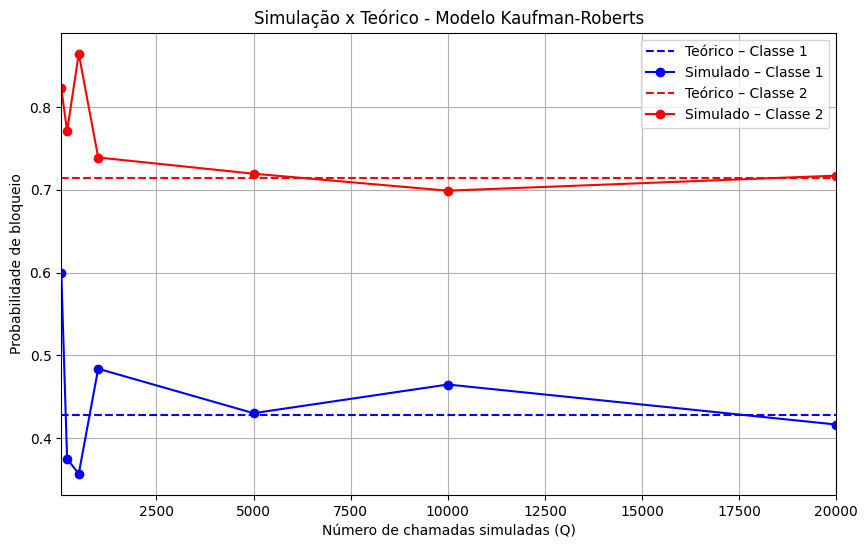

In [134]:
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.metrics import mean_squared_error

#---------- ERLANG-B -------------#

# Definição das entradas

# Da Tabela Erlang-B
# Dados de entrada
C = 2 # Número de canais total

classes_total = {
    'classe_1': {
        'lmd': 60,
        'mu': 60,
        'v': 1
    },
    'classe_2': {
        'lmd': 30*60,
        'mu': 30*60,
        'v': 2
    }
}

# MÉTODO DE KAUFMAN-ROBERTS (TEÓRICO)
ti_k = time.perf_counter()
B_theo, p = kaufman_theo(C, classes_total)
to_k = time.perf_counter()
# Cálculo teórico
print(f'Probabilidade de bloqueio - Kaufman-Roberts (teórico): {C} canais')
for a, b in enumerate(B_theo):
  print(f"Classe {a+1} - Probabilidade de bloqueio: {100*b}%")

print('\n')
# MÉTODO DE KAUFMAN-BOERTS (SIMULAÇÃO)
Q = 200000
print(f'Probabilidade de bloqueio - Kaufman-Roberts (simulação): {C} canais')
ti_s = time.perf_counter()
B_simul = kaufman_simuls(C, classes_total, Q)
to_s = time.perf_counter()

for idx, bi in enumerate(B_simul):
  diff = abs(bi - B_theo[idx])
  print(f'Classe {idx+1}: {100*bi}%. Abs. error: {100*diff:.5f}%')

t_theo = to_k - ti_k
t_simul = to_s - ti_s
print(f'\nTempo de execução - Téorico: {t_theo:.5f} segs.')
print(f'Tempo de execução - Simulação: {t_simul:.5f} segs.')

#--------- PLOT ----------

# Variação do número de chamadas
len_classes = 2
Q = [50, 200, 500, 1000, 5000, 10000, 20000]
classes = list(classes_total.values())
P_B_simul = np.zeros( [len_classes, len(Q)])
for i, q in enumerate(Q):
    B_simul = kaufman_simuls(C, classes_total, q)
    for a in range(len_classes):
        P_B_simul[a, i] = B_simul[a]

# Plot
plt.figure(figsize=(10,6))
for a in range(len_classes):
  if a == 0:
    color = 'blue'
  elif a == 1:
    color = 'red'
  else:
    color = None

  plt.axhline(y=B_theo[a], color=color, linestyle='--', label=f'Teórico – Classe {a+1}')
  plt.plot(Q, P_B_simul[a,:], color=color, marker='o', label=f'Simulado – Classe {a+1}')
#plt.xscale('log')
plt.xlabel('Número de chamadas simuladas (Q)')
plt.ylabel('Probabilidade de bloqueio')
plt.xlim(Q[0], Q[-1])
plt.title("Simulação x Teórico - Modelo Kaufman-Roberts")
plt.grid(True)
plt.legend()
plt.savefig(f'kaufman_simul_tráfego_{C}_canais_{Q[-1]}_chamadas.png', format='png')
plt.show()



## Exemplo 2:
## C = 3
### Classe 1: λ=60s, μ=60s, v=1
### Classe 2: λ=180s, μ=180s, v=1
### Classe 3: λ=480s, μ=480s, v=1

Probabilidade de bloqueio - Kaufman-Roberts (teórico): 3 canais
Classe 1 - Probabilidade de bloqueio: 34.61538461538461%
Classe 2 - Probabilidade de bloqueio: 34.61538461538461%
Classe 3 - Probabilidade de bloqueio: 34.61538461538461%


Probabilidade de bloqueio - Kaufman-Roberts (simulação): 3 canais
Classe 1: 35.24619410085633%. Abs. error: 0.63081%
Classe 2: 34.68299308857017%. Abs. error: 0.06761%
Classe 3: 34.41129189765778%. Abs. error: 0.20409%

Tempo de execução - Téorico: 0.00040 segs.
Tempo de execução - Simulação: 1.45815 segs.


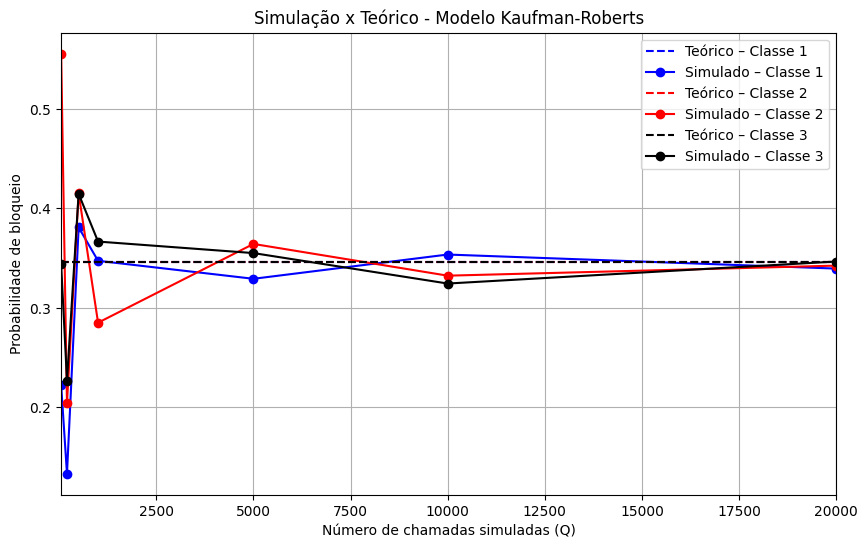

In [141]:
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.metrics import mean_squared_error

#---------- ERLANG-B -------------#

# Definição das entradas

# Da Tabela Erlang-B
# Dados de entrada
C = 3 # Número de canais total

classes_total = {
    'classe_1': {
        'lmd': 60, # 1 min
        'mu': 60, # 1 min
        'v': 1
    },
    'classe_2': {
        'lmd': 3*60, # 3 min
        'mu': 3*60, # 3 min
        'v': 1
    },
    'classe_3': {
        'lmd': 8*60, # 8 min
        'mu': 8*60, # 8 min
        'v': 1
}
}

# MÉTODO DE KAUFMAN-ROBERTS (TEÓRICO)
ti_k = time.perf_counter()
B_theo, p = kaufman_theo(C, classes_total)
to_k = time.perf_counter()
# Cálculo teórico
print(f'Probabilidade de bloqueio - Kaufman-Roberts (teórico): {C} canais')
for a, b in enumerate(B_theo):
  print(f"Classe {a+1} - Probabilidade de bloqueio: {100*b}%")

print('\n')
# MÉTODO DE KAUFMAN-BOERTS (SIMULAÇÃO)
Q = 200000
print(f'Probabilidade de bloqueio - Kaufman-Roberts (simulação): {C} canais')
ti_s = time.perf_counter()
B_simul = kaufman_simuls(C, classes_total, Q)
to_s = time.perf_counter()

for idx, bi in enumerate(B_simul):
  diff = abs(bi - B_theo[idx])
  print(f'Classe {idx+1}: {100*bi}%. Abs. error: {100*diff:.5f}%')

t_theo = to_k - ti_k
t_simul = to_s - ti_s
print(f'\nTempo de execução - Téorico: {t_theo:.5f} segs.')
print(f'Tempo de execução - Simulação: {t_simul:.5f} segs.')

#--------- PLOT ----------

# Variação do número de chamadas
len_classes = 3
Q = [50, 200, 500, 1000, 5000, 10000, 20000]
classes = list(classes_total.values())
P_B_simul = np.zeros( [len_classes, len(Q)])
for i, q in enumerate(Q):
    B_simul = kaufman_simuls(C, classes_total, q)
    for a in range(len_classes):
        P_B_simul[a, i] = B_simul[a]

# Plot
plt.figure(figsize=(10,6))
for a in range(len_classes):
  if a == 0:
    color = 'blue'
  elif a == 1:
    color = 'red'
  elif a == 2:
    color = 'black'
  else:
    color = None
  plt.axhline(y=B_theo[a], color=color, linestyle='--', label=f'Teórico – Classe {a+1}')
  plt.plot(Q, P_B_simul[a,:], color=color, marker='o', label=f'Simulado – Classe {a+1}')

plt.xlabel('Número de chamadas simuladas (Q)')
plt.ylabel('Probabilidade de bloqueio')
plt.grid(True)
plt.legend()
plt.xlim(Q[0], Q[-1])
plt.title("Simulação x Teórico - Modelo Kaufman-Roberts")
plt.savefig(f'kaufman_simul_tráfego_{C}_canais_{Q[-1]}_chamadas.png', format='png')
plt.show()



## Exemplo 3:
## C = 7
### Classe 1: λ=60s, μ=60s, v=1
### Classe 2: λ=180s, μ=180s, v=2
### Classe 3: λ=480s, μ=480s, v=4

Probabilidade de bloqueio - Kaufman-Roberts (teórico): 7 canais
Classe 1 - Probabilidade de bloqueio: 12.110534124629076%
Classe 2 - Probabilidade de bloqueio: 28.763150795791738%
Classe 3 - Probabilidade de bloqueio: 60.34529268950634%


Probabilidade de bloqueio - Kaufman-Roberts (simulação): 7 canais
Classe 1: 11.780390255726578%. Abs. error: 0.33014%
Classe 2: 28.56971610093301%. Abs. error: 0.19343%
Classe 3: 60.38892427591892%. Abs. error: 0.04363%

Tempo de execução - Téorico: 0.00026 segs.
Tempo de execução - Simulação: 0.47089 segs.


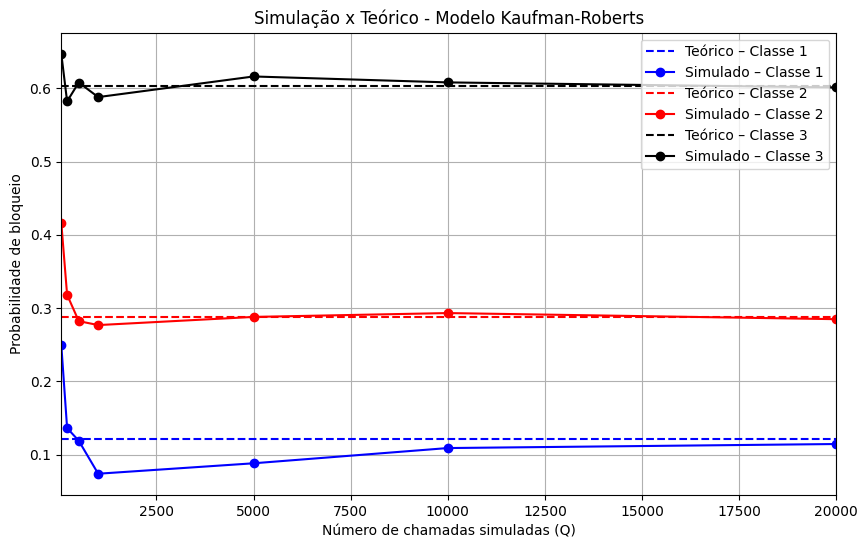

In [142]:
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.metrics import mean_squared_error

#---------- ERLANG-B -------------#

# Definição das entradas

# Da Tabela Erlang-B
# Dados de entrada
C = 7 # Número de canais total

classes_total = {
    'classe_1': {
        'lmd': 60, # 1 min
        'mu': 60, # 1 min
        'v': 1
    },
    'classe_2': {
        'lmd': 3*60, # 3 min
        'mu': 3*60, # 3 min
        'v': 2
    },
    'classe_3': {
        'lmd': 8*60, # 8 min
        'mu': 8*60, # 8 min
        'v': 4
}
}

# MÉTODO DE KAUFMAN-ROBERTS (TEÓRICO)
ti_k = time.perf_counter()
B_theo, p = kaufman_theo(C, classes_total)
to_k = time.perf_counter()
# Cálculo teórico
print(f'Probabilidade de bloqueio - Kaufman-Roberts (teórico): {C} canais')
for a, b in enumerate(B_theo):
  print(f"Classe {a+1} - Probabilidade de bloqueio: {100*b}%")

print('\n')
# MÉTODO DE KAUFMAN-BOERTS (SIMULAÇÃO)
Q = 200000
print(f'Probabilidade de bloqueio - Kaufman-Roberts (simulação): {C} canais')
ti_s = time.perf_counter()
B_simul = kaufman_simuls(C, classes_total, Q)
to_s = time.perf_counter()

for idx, bi in enumerate(B_simul):
  diff = abs(bi - B_theo[idx])
  print(f'Classe {idx+1}: {100*bi}%. Abs. error: {100*diff:.5f}%')

t_theo = to_k - ti_k
t_simul = to_s - ti_s
print(f'\nTempo de execução - Téorico: {t_theo:.5f} segs.')
print(f'Tempo de execução - Simulação: {t_simul:.5f} segs.')

#--------- PLOT ----------

# Variação do número de chamadas
len_classes = 3
Q = [50, 200, 500, 1000, 5000, 10000, 20000]
classes = list(classes_total.values())
P_B_simul = np.zeros( [len_classes, len(Q)])
for i, q in enumerate(Q):
    B_simul = kaufman_simuls(C, classes_total, q)
    for a in range(len_classes):
        P_B_simul[a, i] = B_simul[a]

# Plot
plt.figure(figsize=(10,6))
for a in range(len_classes):
  if a == 0:
    color = 'blue'
  elif a == 1:
    color = 'red'
  elif a == 2:
    color = 'black'
  else:
    color = None
  plt.axhline(y=B_theo[a], color=color, linestyle='--', label=f'Teórico – Classe {a+1}')
  plt.plot(Q, P_B_simul[a,:], color=color, marker='o', label=f'Simulado – Classe {a+1}')

plt.xlabel('Número de chamadas simuladas (Q)')
plt.ylabel('Probabilidade de bloqueio')
plt.grid(True)
plt.legend()
plt.xlim(Q[0], Q[-1])
plt.title("Simulação x Teórico - Modelo Kaufman-Roberts")
plt.savefig(f'kaufman_simul_tráfego_{C}_canais_{Q[-1]}_chamadas.png', format='png')
plt.show()



In [88]:
classes_exemplo = [
    # Classe 0 - Voz
    {'lam': 2.0, 'mu': 2.0, 'v': 1},

    # Classe 1 - Vídeo
    {'lam': 0.5, 'mu': 0.5, 'v': 2}
]
print(classes_exemplo['lam'])

TypeError: list indices must be integers or slices, not str